In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import scipy.stats as stats
import distribution as dist

In [9]:
dioExams = pd.read_csv("CSV/DiagnosticExams.csv")
dioExams.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Percentage,Flag Codes,Flags
0,DGTSCTEX,"Computed Tomography exams, total",NOMBRENB,Number,AUS,Australia,2010,2010,2061214.0,D,Difference in methodology
1,DGTSCTEX,"Computed Tomography exams, total",NOMBRENB,Number,AUS,Australia,2011,2011,2037101.0,D,Difference in methodology
2,DGTSCTEX,"Computed Tomography exams, total",NOMBRENB,Number,AUS,Australia,2012,2012,2365597.0,D,Difference in methodology
3,DGTSCTEX,"Computed Tomography exams, total",NOMBRENB,Number,AUS,Australia,2013,2013,2540546.0,D,Difference in methodology
4,DGTSCTEX,"Computed Tomography exams, total",NOMBRENB,Number,AUS,Australia,2014,2014,2709088.0,D,Difference in methodology


In [10]:
dioExams = dioExams[dioExams["Measure"] == "Per 1 000 population"]
dioExams.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Percentage,Flag Codes,Flags
12,DGTSCTEX,"Computed Tomography exams, total",RTOINPNB,Per 1 000 population,AUS,Australia,2010,2010,93.6,D,Difference in methodology
13,DGTSCTEX,"Computed Tomography exams, total",RTOINPNB,Per 1 000 population,AUS,Australia,2011,2011,91.2,D,Difference in methodology
14,DGTSCTEX,"Computed Tomography exams, total",RTOINPNB,Per 1 000 population,AUS,Australia,2012,2012,104.1,D,Difference in methodology
15,DGTSCTEX,"Computed Tomography exams, total",RTOINPNB,Per 1 000 population,AUS,Australia,2013,2013,109.8,D,Difference in methodology
16,DGTSCTEX,"Computed Tomography exams, total",RTOINPNB,Per 1 000 population,AUS,Australia,2014,2014,115.4,D,Difference in methodology


In [17]:
wantedData = dioExams[["Variable", "Country", "Year", "Percentage"]]
wantedData = wantedData[wantedData["Variable"] == "Computed Tomography exams, total"]
wantedData.head()

,Variable,Country,Year,Percentage


Percentage
Mean: 51.71229100768188
Std: 59.07103634862392



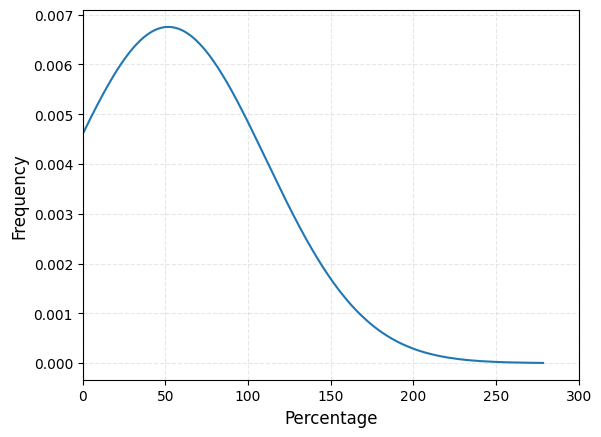

/Users/jonathan/Documents/Coding Projects/Hackalytics/BeastCancer/distribution.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


,Country,Year,Percentage
12,Australia,2010,0.336207
13,Australia,2011,0.327586
14,Australia,2012,0.373922
15,Australia,2013,0.394397
16,Australia,2014,0.414511


In [12]:
xCol = "Percentage"
valueMean, valueStd = dist.dist_info(wantedData, xCol)
dist.dist_plot(wantedData, xCol, valueMean, valueStd, 0, 300)
wantedData = dist.add_norm(wantedData, xCol, "Percentage")
wantedData.head()